In [2]:
import wave
import numpy as np

#this audio says "memohon maaf"
jnt = wave.open("../jnt-memohonmaaf.wav", "r")
jnt_soundwave = jnt.readframes(-1)

In [3]:
import librosa
audio_data1 = '../jnt-memohonmaaf.wav'
x , sampling_rate = librosa.load(audio_data1)
print(type(x), type(sampling_rate))
print(x.shape, sampling_rate)

<class 'numpy.ndarray'> <class 'int'>
(50274,) 22050


In [4]:
# jnt-memohonmaaf_normal
import IPython.display as ipd
ipd.Audio(audio_data1)

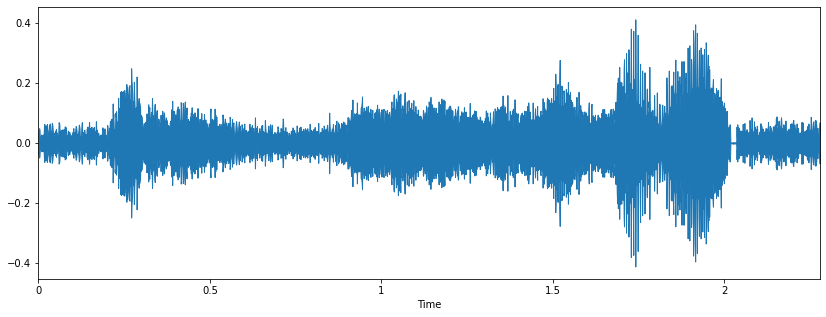

In [9]:
# jnt-memohonmaaf_normal
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sampling_rate)

In [11]:
# jnt-memohonmaaf_slowed
jnt_slow = wave.open("../jnt-memohonmaaf-slowed.wav", "r")
jnt_soundwave_slow = jnt_slow.readframes(-1)

import librosa
audio_data1_slow = '../jnt-memohonmaaf-slowed.wav'
y , sampling_rate = librosa.load(audio_data1_slow)
print(type(y), type(sampling_rate))
print(y.shape, sampling_rate)

<class 'numpy.ndarray'> <class 'int'>
(71357,) 22050


In [12]:
# jnt-memohonmaaf_slowed
import IPython.display as ipd
ipd.Audio(audio_data1_slow)

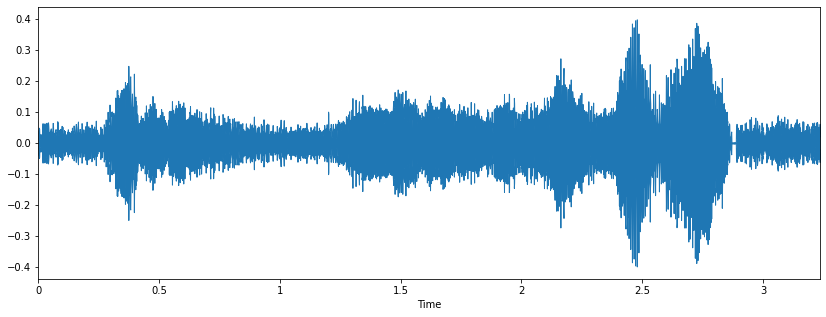

In [8]:
# jnt-memohonmaaf_slowed
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sampling_rate)

In [24]:
#---------------------------------------------------------------
#this audio says "jnt perak"
jnt2 = wave.open("../jnt-perak.wav", "r")
jnt2_soundwave = jnt2.readframes(-1)

import librosa
audio_data2 = '../jnt-perak.wav'
a , sampling_rate = librosa.load(audio_data2)
print(type(a), type(sampling_rate))
print(a.shape, sampling_rate)

<class 'numpy.ndarray'> <class 'int'>
(34839,) 22050


In [14]:
# jnt perak normal
import IPython.display as ipd
ipd.Audio(audio_data2)

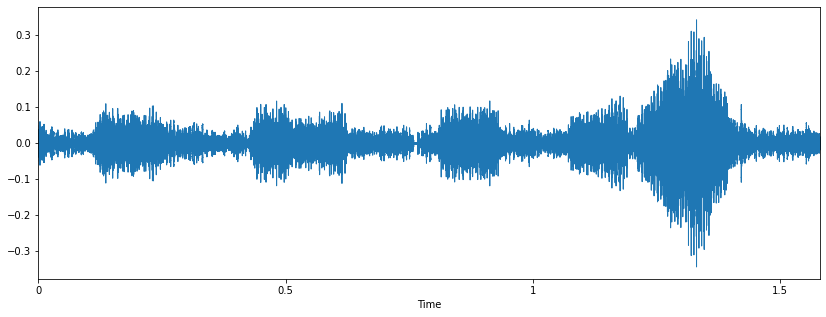

In [15]:
# jnt perak normal
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(a, sr=sampling_rate)

In [23]:
# jnt perak slow
jnt2_slow = wave.open("../jnt-perak-slowed.wav", "r")
jnt2_soundwave_slow = jnt2.readframes(-1)

import librosa
audio_data2_slow = '../jnt-perak-slowed.wav'
b , sampling_rate = librosa.load(audio_data2_slow)
print(type(b), type(sampling_rate))
print(b.shape, sampling_rate)

<class 'numpy.ndarray'> <class 'int'>
(49286,) 22050


In [17]:
# jnt perak slow
import IPython.display as ipd
ipd.Audio(audio_data2_slow)

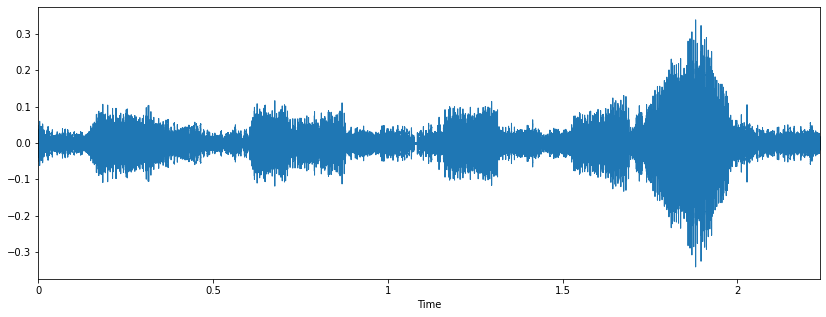

In [18]:
# jnt perak slow
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(b, sr=sampling_rate)

In [19]:
# the dynamic time warping implementation
def dtw(fast, normal):
    fast_len = len(fast)
    normal_len = len(normal)
    dtw_matrix = np.zeros((fast_len+1,normal_len+1))
    
    for i in range(fast_len+1):
        for j in range(normal_len+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0,0] = 0
    
    for i in range(1, fast_len+1):
        for j in range(1, normal_len+1):
            cost = abs(fast[i-1] - normal[j-1])
            
            last_min = np.min([dtw_matrix[i-1,j], dtw_matrix[i,j-1],dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [20]:
# comparing same audio, with different speed (jnt memohon maaf)
print("\nmemohon maaf vs memohon maaf (slowed):")
print(dtw(jnt_soundwave[:10], jnt_soundwave_slow[:10]))


memohon maaf vs memohon maaf (slowed):
[[  0.  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf   1. 174. 175. 348. 370. 543. 565. 738. 747. 920.]
 [ inf 173.   1. 173. 173. 324. 324. 475. 475. 639. 639.]
 [ inf 174. 174.   2. 175. 195. 368. 346. 519. 484. 657.]
 [ inf 346. 174. 174.   2. 153. 153. 304. 304. 468. 468.]
 [ inf 366. 326. 194. 154.   3. 155. 154. 306. 316. 468.]
 [ inf 538. 326. 366. 154. 154.   3. 154. 154. 318. 316.]
 [ inf 558. 478. 346. 306. 155. 155.   4. 156. 166. 318.]
 [ inf 730. 478. 518. 306. 306. 155. 155.   4. 168. 166.]
 [ inf 737. 643. 485. 471. 320. 320. 169. 169.   5. 170.]
 [ inf 909. 643. 657. 471. 471. 320. 320. 169. 169.   5.]]


In [25]:
# comparing same audio, with different speed (jnt perak)
print("\n\njnt perak vs jnt perak (slowed):")
print(dtw(jnt2_soundwave[:10], jnt2_soundwave_slow[:10]))



jnt perak vs jnt perak (slowed):
[[ 0.]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]


In [22]:
# comparing different audio(maaf and perak)
print("\n\nmemohon maaf vs jnt perak:")
print(dtw(jnt_soundwave[:10], jnt2_soundwave[:10]))



memohon maaf vs jnt perak:
[[   0.   inf   inf   inf   inf   inf   inf   inf   inf   inf   inf]
 [  inf   17.   97.  114.  194.  226.  306.  338.  418.  438.  518.]
 [  inf  207.  270.  287.  367.  335.  479.  447.  591.  611.  691.]
 [  inf  224.  287.  287.  367.  367.  415.  447.  527.  547.  627.]
 [  inf  414.  477.  477.  540.  508.  620.  556.  700.  720.  800.]
 [  inf  452.  515.  515.  578.  519.  609.  567.  657.  698.  799.]
 [  inf  642.  705.  705.  768.  660.  772.  708.  820.  850.  951.]
 [  inf  680.  743.  743.  806.  671.  761.  719.  809.  850.  951.]
 [  inf  870.  933.  933.  996.  812.  924.  860.  972. 1002. 1103.]
 [  inf  895.  958.  958. 1021.  836.  900.  884.  948.  976. 1064.]
 [  inf 1085. 1148. 1148. 1211.  977. 1089. 1025. 1137. 1141. 1229.]]


In [29]:
# convert the numpy array to list, to analyse with fastdtw
jnt_maaf = x.tolist()
jnt_maaf_slow = y.tolist()

jnt_perak = a.tolist()
jnt_perak_slow = b.tolist()
print("Successful converted")

Successful converted


In [33]:
# using fastdtw library
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# --------------------------------------------------------------------

# comparing same audio, with different speed (jnt memohon maaf)
print("Fast DTW\nmemohon maaf vs memohon maaf (slowed):")
distance1, path1 = fastdtw(jnt_maaf, jnt_maaf_slow, dist=euclidean)

print("The distance between them is: "+ str(distance1) +"\n")
print("The matched path are:")
# print(distance1)
print(path1)

Fast DTW
memohon maaf vs memohon maaf (slowed):
The distance between them is: 2157.623173179946

The matched path are:
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), 

In [34]:
# comparing same audio, with different speed (jnt perak)
print("Fast DTW\njnt perak vs jnt perak (slowed):")
distance2, path2 = fastdtw(jnt_perak, jnt_perak_slow, dist=euclidean)

print("The distance between them is: "+ str(distance2) +"\n")
print("The matched path are:")
# print(distance2)
print(path2)

Fast DTW
jnt perak vs jnt perak (slowed):
The distance between them is: 897.1648839200986

The matched path are:
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 9

In [35]:
# comparing different audio(maaf and perak)
print("Fast DTW\nmemohon maaf vs jnt perak:")

distance3, path3 = fastdtw(jnt_maaf, jnt_perak, dist=euclidean)

print("The distance between them is: "+ str(distance3) +"\n")
print("The matched path are:")
# print(distance3)
print(path3)

Fast DTW
memohon maaf vs jnt perak:
The distance between them is: 1319.9160220926758

The matched path are:
[(0, 0), (1, 1), (2, 2), (3, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 4), (16, 4), (17, 4), (18, 4), (19, 5), (20, 6), (21, 7), (21, 8), (22, 9), (23, 10), (24, 10), (25, 11), (26, 11), (27, 11), (28, 11), (29, 11), (30, 11), (31, 11), (32, 11), (33, 11), (34, 11), (35, 11), (36, 11), (37, 11), (38, 11), (39, 11), (40, 11), (41, 11), (42, 11), (43, 11), (44, 11), (45, 11), (46, 11), (47, 11), (48, 11), (49, 12), (50, 12), (51, 13), (52, 14), (53, 15), (54, 15), (55, 15), (56, 16), (57, 16), (58, 16), (59, 16), (60, 16), (61, 16), (62, 16), (63, 16), (64, 16), (65, 16), (66, 16), (67, 16), (68, 16), (69, 17), (70, 17), (71, 17), (72, 17), (73, 17), (74, 18), (75, 19), (76, 20), (77, 20), (78, 20), (79, 21), (80, 21), (81, 21), (82, 21), (83, 21), (84, 21), (85, 21), (86, 21), (87, 22), (88, 22), (89, 22), (90, 22), (91, 